# MNIST

In [49]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [50]:

from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## Load data

In [51]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

random_state = 42
models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),   
    "SVM": SVC(C = 0.5, kernel = "poly",max_iter = 10000, random_state = 42),
    "LogisticRegression": LogisticRegression(C = 0.5,max_iter = 10000, random_state = 42)
}

## Helpers

##  Data exploration

### Question 1
Hint: `plt.imshow`

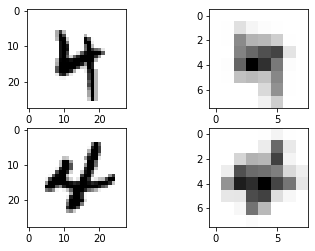

In [52]:
f, arr = plt.subplots(2,2)
index1 = 6
index2 = 8

arr[0,0].imshow(mnist_28x28_train[index1],cmap=plt.cm.gray_r,interpolation = 'nearest')
arr[0,1].imshow(mnist_8x8_train[index1],cmap=plt.cm.gray_r,interpolation = 'nearest')
arr[1,0].imshow(mnist_28x28_train[index2],cmap=plt.cm.gray_r,interpolation = 'nearest')
arr[1,1].imshow(mnist_8x8_train[index2],cmap=plt.cm.gray_r,interpolation = 'nearest')

##  Data Preparations

### Question 1

In [58]:
#preprocessing
# since most algorithms use 2d datasets we had to reshape the dataset
# also part of the preprocessing was normalizing the values so that they fit into the 0,1 range
nrval,x,y = mnist_8x8_train.shape
mnist_8x8_train_2d = mnist_8x8_train.reshape(nrval,x*y)

min_max_scaler = preprocessing.MinMaxScaler()
mnist_8x8_train_2d_minmax = min_max_scaler.fit_transform(mnist_8x8_train_2d)



mnist_8x8_train_2d_scaled = preprocessing.scale(mnist_8x8_train_2d)



mnist_8x8_train_2d_minmax_scaled = preprocessing.scale(mnist_8x8_train_2d_minmax)

#mnist_8x8_train_2d_minmax




p,m,n = mnist_28x28_train.shape
mnist_28x28_train_2d = mnist_28x28_train.reshape(p,m*n)
mnist_28x28_train_2d_minmax = min_max_scaler.fit_transform(mnist_28x28_train_2d)




entries = range(0,3750)
matrixvalues = range(0,64)
matrixvalues2 = range(0,784)
mnist8minmax = pd.DataFrame(mnist_8x8_train_2d_minmax,entries,matrixvalues)
mnist28minmax = pd.DataFrame(mnist_28x28_train_2d_minmax,entries,matrixvalues2)


r, l , n = mnist_8x8_test.shape
mnist_8x8_test_2d = mnist_8x8_test.reshape(mnist_8x8_test.shape[0], 64)
min_max_scaler = preprocessing.MinMaxScaler()
mnist_8x8_test_2d_minmax = min_max_scaler.fit_transform(mnist_8x8_test_2d)

mnist8testminmax = pd.DataFrame(mnist_8x8_test_2d_minmax, range(0, mnist_8x8_test.shape[0]) ,matrixvalues)

## Experiments

### Question 1

In [6]:
#using classic kfold
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    # define evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate model
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv,n_jobs =-1)
    
       
    return scores["test_score"]

#using stratified kfold

def sk_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=2):
    sk_fold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=sk_fold, n_jobs=-1)
    return scores["test_score"]

### Question 2

8x8 model

GaussianNB
- mean Accuracy:  0.5591999999999999
- std Accuracy:  0.021368304669403336
DecisionTreeClassifier
- mean Accuracy:  0.7693333333333333
- std Accuracy:  0.018676188047886004
KNeighborsClassifier
- mean Accuracy:  0.9210666666666667
- std Accuracy:  0.012744323355038424
SVM
- mean Accuracy:  0.8952
- std Accuracy:  0.014510685717773638
LogisticRegression
- mean Accuracy:  0.8730666666666667
- std Accuracy:  0.015603988094216321

28x28 model

GaussianNB
- mean Accuracy:  0.5616
- std Accuracy:  0.026645324793166506
DecisionTreeClassifier
- mean Accuracy:  0.7456
- std Accuracy:  0.01518829959029136
KNeighborsClassifier
- mean Accuracy:  0.9288000000000001
- std Accuracy:  0.010331397668165607
SVM
- mean Accuracy:  0.9101333333333332
- std Accuracy:  0.011441833574893293
LogisticRegression
- mean Accuracy:  0.8866666666666667
- std Accuracy:  0.01700196067124808
Number of splits for the K Folds: 10


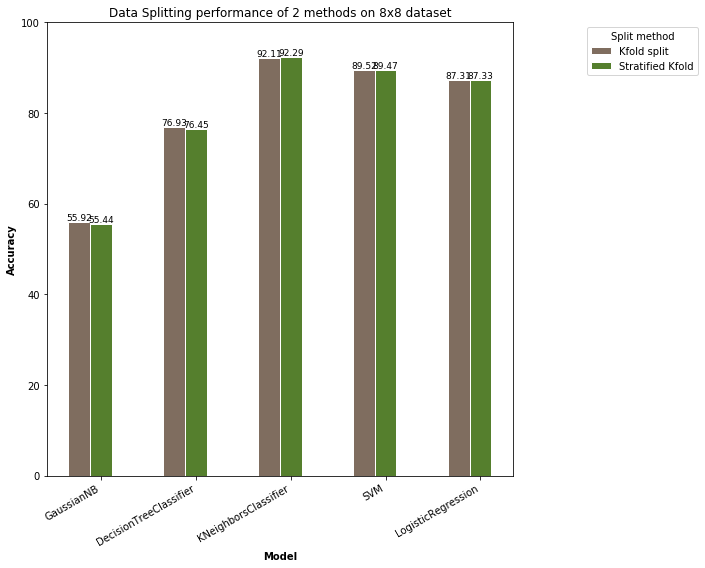

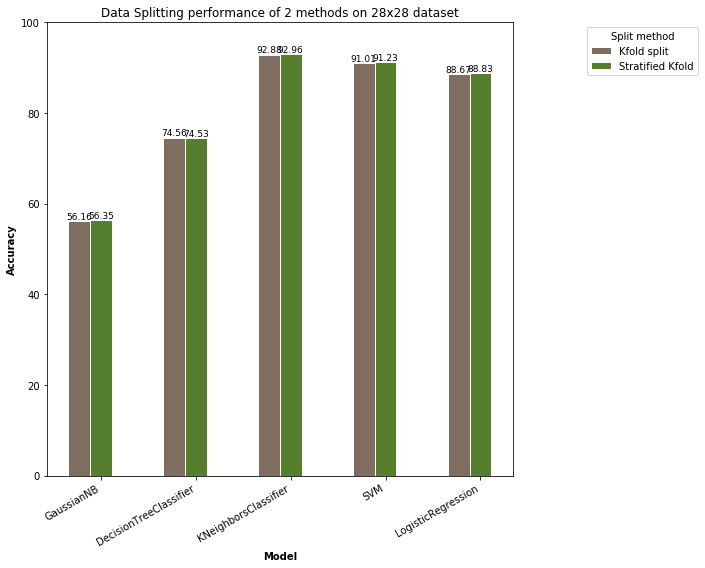

In [7]:
#evaluation models
scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))
scoring_method_accuracy = make_scorer(lambda prediction, true_target: accuracy_score(prediction, true_target)) 

n_splits = 10
dict_kfold = dict()
dict_skfold = dict()

dict_kfold28 = dict()
dict_skfold28 = dict()


print("8x8 model")
print()

for name, model in models.items():
    print(name) 
    metrics_accuracy = k_fold_fit_and_evaluate(mnist8minmax, train_labels, model, scoring_method_accuracy, n_splits=n_splits)
    metrics_s_accuracy = sk_fold_fit_and_evaluate(mnist8minmax, train_labels, model, scoring_method_accuracy, n_splits=n_splits)

    
    dict_kfold[name] = np.round(np.mean(metrics_accuracy)*100,2)
    dict_skfold[name] = np.round(np.mean(metrics_s_accuracy)*100,2)
    print("- mean Accuracy: ", np.mean(metrics_accuracy))
    print("- std Accuracy: ", np.std(metrics_accuracy))

print()
print("28x28 model")
print()

for name, model in models.items():
    print(name)
    metrics_accuracy = k_fold_fit_and_evaluate(mnist28minmax, train_labels, model, scoring_method_accuracy, n_splits=n_splits)
    metrics_s_accuracy = sk_fold_fit_and_evaluate(mnist28minmax, train_labels, model, scoring_method_accuracy, n_splits=n_splits)
    
    dict_kfold28[name] = np.round(np.mean(metrics_accuracy)*100,2)
    dict_skfold28[name] = np.round(np.mean(metrics_s_accuracy)*100,2)
   
    print("- mean Accuracy: ", np.mean(metrics_accuracy))
    print("- std Accuracy: ", np.std(metrics_accuracy))


print("Number of splits for the K Folds:", n_splits)

    
barWidth = 0.23

bars1 = list(dict_kfold.values())
bars2 = list(dict_skfold.values())

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


fig = plt.figure(figsize=(10, 8))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Kfold split')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Stratified Kfold')

plt.xticks([r + barWidth for r in range(len(bars1))], list(models.keys()))
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

for i in range(len(bars1)):
    plt.annotate(str(bars1[i]), xy=(r1[i],bars1[i]), ha='center', va='bottom', size=9)
    plt.annotate(str(bars2[i]), xy=(r2[i],bars2[i]), ha='center', va='bottom', size=9)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', title='Split method')
plt.title('Data Splitting performance of 2 methods on 8x8 dataset')
fig.autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 100)    
plt.show()


barWidth = 0.23
#bars1 = list(dict_simple.values())
bars3 = list(dict_kfold28.values())
bars4 = list(dict_skfold28.values())

r3 = np.arange(len(bars1))
r4 = [x + barWidth for x in r1]


fig = plt.figure(figsize=(10, 8))
plt.bar(r3, bars3, color='#7f6d5f', width=barWidth, edgecolor='white', label='Kfold split')
plt.bar(r4, bars4, color='#557f2d', width=barWidth, edgecolor='white', label='Stratified Kfold')

plt.xticks([r + barWidth for r in range(len(bars1))], list(models.keys()))
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

for i in range(len(bars1)):
    plt.annotate(str(bars3[i]), xy=(r3[i],bars3[i]), ha='center', va='bottom', size=9)
    plt.annotate(str(bars4[i]), xy=(r4[i],bars4[i]), ha='center', va='bottom', size=9)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', title='Split method')
plt.title('Data Splitting performance of 2 methods on 28x28 dataset')
fig.autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 100)    
plt.show()

### Question 3

Accuracy of model, done with kfold, after hyper-parameter tuning with the current given parameters.
GaussianNB
- best_score = 0.5591999999999999
- best parameters:
DecisionTreeClassifier
- best_score = 0.7704000000000001
- best parameters:
  - max_depth None
  - min_samples_leaf 5
  - random_state 42
KNeighborsClassifier
- best_score = 0.9221333333333334
- best parameters:
  - n_neighbors 4
  - weights uniform
SVM
- best_score = 0.9554666666666668
- best parameters:
  - C 4
  - gamma 0.7
  - kernel rbf
  - random_state 42
LogisticRegression
- best_score = 0.8941333333333334
- best parameters:
  - C 7
  - max_iter 1000
  - penalty l2
  - random_state 42


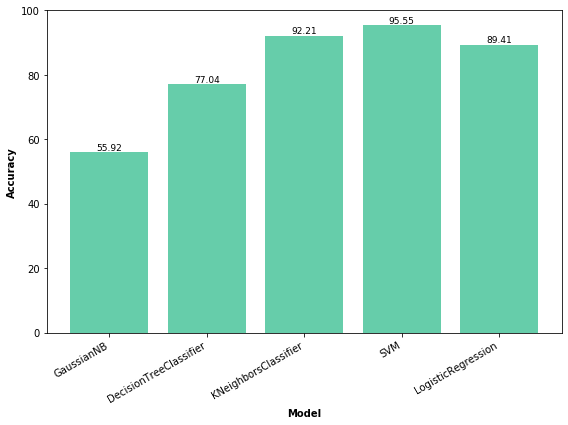

Accuracy of model, done with kfold, after hyper-parameter tuning with the current given parameters.
GaussianNB
- best_score = 0.5616
- best parameters:
DecisionTreeClassifier
- best_score = 0.748
- best parameters:
  - max_depth 10
  - min_samples_leaf 4
  - random_state 42
KNeighborsClassifier
- best_score = 0.9309333333333333
- best parameters:
  - n_neighbors 4
  - weights distance
SVM
- best_score = 0.9290666666666667
- best parameters:
  - C 2
  - gamma 0.6
  - kernel poly
  - random_state 42
LogisticRegression
- best_score = 0.8794666666666666
- best parameters:
  - C 2
  - max_iter 1000
  - penalty l2
  - random_state 42


In [8]:
model_parameters = {
    "GaussianNB": {},
    "DecisionTreeClassifier": {
        'max_depth': [None, 5, 10],
        'random_state': [random_state],
        'min_samples_leaf': [4, 5, 7]
    },
    "KNeighborsClassifier": {
        'n_neighbors': [3,4,5,8],
        'weights': ['uniform', 'distance']
    },
    "SVM": {
        'C': [2,4,5],
        'kernel': ['rbf', 'poly'],
        'gamma':[0.6,0.7,0.75],
        'random_state': [random_state]
    },
    "LogisticRegression": {
        'C': [2, 4, 7],
        'penalty': ['none', 'l1', 'l2'],
        'random_state': [random_state],
        'max_iter': [1000]
    }
}

dict_models = dict()
print("Accuracy of model, done with kfold, after hyper-parameter tuning with the current given parameters.")

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method_accuracy).fit(mnist8minmax, train_labels)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    dict_models[model_name] = np.round(np.mean(best_score)*100, 2)
    
    print(model_name)
    print("- best_score =", best_score)
    print("- best parameters:")
    for k,v in best_params.items():
        print("  -", k, v)
        
bar = list(dict_models.values())
r = np.arange(len(bar))

fig = plt.figure(figsize=(8, 6))
plt.bar(*zip(*dict_models.items()), color='mediumaquamarine')
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')

for i in range(len(bar)):
    plt.annotate(str(bar[i]), xy=(r[i],bar[i]), ha='center', va='bottom', size=9)

fig.autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 100)
plt.show()

dict_models28 = dict()
print("Accuracy of model, done with kfold, after hyper-parameter tuning with the current given parameters.")

for model_name, parameters in model_parameters.items():
    model = models[model_name]
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    grid_search = GridSearchCV(model, parameters, cv=cv, n_jobs=-1, verbose=False, scoring=scoring_method_accuracy).fit(mnist28minmax, train_labels)
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    dict_models[model_name] = np.round(np.mean(best_score)*100, 2)
    
    print(model_name)
    print("- best_score =", best_score)
    print("- best parameters:")
    for k,v in best_params.items():
        print("  -", k, v)

### Question 4 

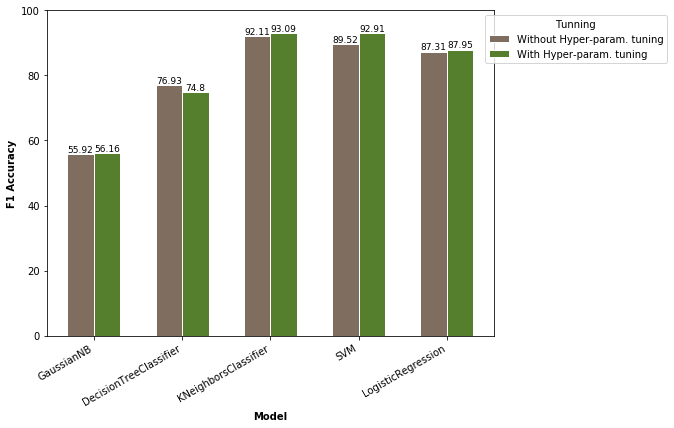

In [9]:
barWidth = 0.30
bars1 = list(dict_kfold.values())
bars2 = list(dict_models.values())

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Without Hyper-param. tuning')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='With Hyper-param. tuning')

plt.xticks([r + barWidth/2 for r in range(len(bars1))],list(model_parameters.keys()))
plt.xlabel('Model', fontweight='bold')
plt.ylabel('F1 Accuracy', fontweight='bold')

for i in range(len(bars1)):
    plt.annotate(str(bars1[i]), xy=(r1[i],bars1[i]), ha='center', va='bottom', size=9)
    plt.annotate(str(bars2[i]), xy=(r2[i],bars2[i]), ha='center', va='bottom', size=9)

plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Tunning')
fig.autofmt_xdate()
plt.tight_layout()
plt.ylim(0, 100)    
plt.show()

### Question 5

##### ~ Written in the report ~

### Question 6

In [64]:
classifier = SVC(C=4, gamma=0.7, kernel='rbf', random_state=42).fit(mnist8minmax, train_labels)
prediction = classifier.predict(mnist8testminmax)
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)